# 2 Tensor 的操作

In [57]:
import torch
import numpy as np

## 2.1 拼接

### 1. 将张量序列在原有维度上拼接 torch.cat()

In [ ]:
# torch.cat(tensors, dim=0, out=None)
# tensors 表示要拼接的张量序列， dim 表示按照哪个维度进行拼接

tensor_1 = torch.rand(2, 3)
tensor_2 = torch.rand(2, 3)
print(tensor_1)
print(tensor_2)

In [4]:
tensor_cat = torch.cat([tensor_1, tensor_2], 0)
print(tensor_cat)

tensor([[0.7421, 0.6789, 0.3961],
        [0.4389, 0.5775, 0.7001],
        [0.1187, 0.6341, 0.2575],
        [0.2141, 0.4144, 0.5184]])


In [5]:
tensor_A = torch.rand(2, 1)
tensor_B = torch.rand(2, 5)
tensor_cat = torch.cat([tensor_B, tensor_A], 1)
print(tensor_A)     # tensor_A.size = [2, 1]
print(tensor_B)     # tensor_B.size = [2, 5]
print(tensor_cat)   # tensor_cat.size = [2, 6]

tensor([[0.6500],
        [0.0206]])
tensor([[0.7091, 0.9384, 0.9666, 0.2591, 0.6860],
        [0.7791, 0.5712, 0.4295, 0.4543, 0.5958]])
tensor([[0.7091, 0.9384, 0.9666, 0.2591, 0.6860, 0.6500],
        [0.7791, 0.5712, 0.4295, 0.4543, 0.5958, 0.0206]])


关于在某个维度上的拼接：以二维张量举例，想象两个二维张量 A，B 是两片辣条，其分别在第一维度 x 和第二维度 y 上各有一个竹签。
<br>把 A 和 B 在第一维度上拼接，（如果 Tensors 序列是 [A, B]），也即把辣条 B 沿着辣条 A 的 第一维度 x 的竹签穿进去，A 在上 B 在下。

### 2. 将 Tensors 序列在**新建维度**上拼接 torch.stack()

In [8]:
# torch.stack(tensors, dim=0, out=None)
# 功能：将张量在新创建的 dim 维度上进行拼接
# tensors: 张量序列
# dim: 要拼接的维度

tensor1 = torch.rand(2, 2)
tensor2 = torch.rand(2, 2)
tensor3 = torch.rand(2, 2)
print(tensor1)
print(tensor2)
print(tensor3)

tensor_stack = torch.stack([tensor1, tensor2, tensor3], 2)  # 维度数值越大，格局越小
print(tensor_stack)     # size = [2, 2, 3]

tensor_stack = torch.stack([tensor1, tensor2, tensor3], 0)  # 维度数值越小，格局越大
print(tensor_stack)     # size = [3, 2, 2]

# 注意两者的区别！！！！

tensor([[0.8203, 0.2081],
        [0.7648, 0.1764]])
tensor([[0.4740, 0.7160],
        [0.1681, 0.0397]])
tensor([[0.5089, 0.7330],
        [0.6470, 0.6026]])
tensor([[[0.8203, 0.4740, 0.5089],
         [0.2081, 0.7160, 0.7330]],

        [[0.7648, 0.1681, 0.6470],
         [0.1764, 0.0397, 0.6026]]])
tensor([[[0.8203, 0.2081],
         [0.7648, 0.1764]],

        [[0.4740, 0.7160],
         [0.1681, 0.0397]],

        [[0.5089, 0.7330],
         [0.6470, 0.6026]]])


## 2.2 切分

### 2.2.1 将 Tensor 按照维度 dim 进行平均切分为 chunks 份 torch.chunk()

In [11]:
# torch.chunk(input, chunks, dim=0) 其中 chunks 代表分成几份
a = torch.ones((2, 7))
print(a)
list_of_tensors = torch.chunk(a, chunks=3, dim=1)
for index, tensor in enumerate(list_of_tensors):
    print("第{}个张量：{}，shape is {}".format(index+1, tensor, tensor.shape))

# 不能均分的话向上取整，例如此例中 7 分为 3 份，7/3 向上取整为 3，所以前两个 Tensor 为 [2,3]，最后一个为 [2,1]。

tensor([[1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1.]])
第1个张量：tensor([[1., 1., 1.],
        [1., 1., 1.]])，shape is torch.Size([2, 3])
第2个张量：tensor([[1., 1., 1.],
        [1., 1., 1.]])，shape is torch.Size([2, 3])
第3个张量：tensor([[1.],
        [1.]])，shape is torch.Size([2, 1])


### 2.2.2 将张量按照维度 dim 依据 split_size_or_sections 进行切分

In [19]:
# torch.split(tensor, split_size_or_sections, dim=0)
# 功能：将张量按照维度 dim 进行平均切分。可以指定每一个分量的切分长度。
# split_size_or_sections: 为 int 时，表示每一份的长度，如果不能被整除，则最后一份张量小于其他张量；
# 为 list 时，按照 list 元素作为每一个分量的长度切分。如果 list 元素之和不等于切分维度 (dim) 的值，就会报错。
a = torch.rand(2, 7)
b = torch.split(a, [3, 2, 2], dim=1)
print(a)
print(b)
print(type(b))

tensor([[0.5199, 0.8233, 0.7602, 0.3653, 0.5161, 0.3510, 0.5574],
        [0.1024, 0.0302, 0.5910, 0.4883, 0.6167, 0.9588, 0.9437]])
(tensor([[0.5199, 0.8233, 0.7602],
        [0.1024, 0.0302, 0.5910]]), tensor([[0.3653, 0.5161],
        [0.4883, 0.6167]]), tensor([[0.3510, 0.5574],
        [0.9588, 0.9437]]))
<class 'tuple'>


## 2.3 索引

### 2.3.1 torch.index_select()

In [28]:
# torch.index_select(input: Tensor, dim: _int, index: Tensor, *, out: Tensor | None = None) -> Tensor
# 在维度 dim 上，按照 index 索引将输入的 Tensor 拼接为张量返回。

inputTensor = torch.rand(3, 5, 4)
print(inputTensor)
indexTensor = torch.tensor([1], dtype=int)  # 绝不能使 dtype=float，因此一定要显式标定 dtype=int
outTensor = torch.index_select(inputTensor, 1, indexTensor) # 输出各块的第一行
print(outTensor)

tensor([[[0.5910, 0.2471, 0.9979, 0.6209],
         [0.4718, 0.5558, 0.3135, 0.3275],
         [0.3956, 0.4346, 0.5931, 0.6439],
         [0.2736, 0.4478, 0.1543, 0.1686],
         [0.4173, 0.1818, 0.6967, 0.5155]],

        [[0.6322, 0.7430, 0.6748, 0.1282],
         [0.7345, 0.8894, 0.1836, 0.9452],
         [0.7236, 0.7168, 0.9930, 0.9584],
         [0.6033, 0.6645, 0.6590, 0.6013],
         [0.1273, 0.5277, 0.4572, 0.3410]],

        [[0.9687, 0.9072, 0.2690, 0.3785],
         [0.1890, 0.8304, 0.4572, 0.9037],
         [0.2982, 0.4347, 0.7407, 0.9184],
         [0.9774, 0.2094, 0.4502, 0.9758],
         [0.3592, 0.7270, 0.9872, 0.4378]]])
tensor([[[0.4718, 0.5558, 0.3135, 0.3275]],

        [[0.7345, 0.8894, 0.1836, 0.9452]],

        [[0.1890, 0.8304, 0.4572, 0.9037]]])


### 2.3.2 torch.masked_select()

In [33]:
# torch.masked_select(input: Tensor, mask: Tensor, *, out: Tensor | None = None) -> Tensor
# 功能：按照 mask 中的 True 进行索引拼接得到一维张量返回。
# mask: 与 input 同形状的布尔类型张量
inputTensor = torch.randint(0, 9, size=(3, 3))  # 随机生成整型 3*3 的张量，元素大小在 [0,9) 之间。
mask = inputTensor.ge(7)    # eq=, le<= ，ge>=
print(inputTensor)
print(mask)
outTensor = torch.masked_select(inputTensor, mask)
print(outTensor)        # 最后返回的是一维张量


tensor([[7, 6, 2],
        [5, 0, 0],
        [5, 7, 7]])
tensor([[ True, False, False],
        [False, False, False],
        [False,  True,  True]])
tensor([7, 7, 7])


## 2.4 变换

### 2.4.1 变换张量的形状 reshape()

In [49]:
# torch.reshape(input: Tensor, shape: _size)
inputTensor = torch.randint(0, 9, size=(2, 4))
print(inputTensor)
outTensor = torch.reshape(inputTensor, shape=(-1, 2, 2))    # -1表示这个维度是由其他维度计算出来的
print(outTensor)
print(outTensor.shape)
print(inputTensor[1,0])
inputTensor[1, 0] = 5
print(inputTensor)
print(outTensor)    # 当张量在内存中是连续时，返回的张量和原来的张量共享数据内存，改变一个变量时，另一个变量也会被改变。

tensor([[7, 0, 5, 7],
        [7, 2, 4, 5]])
tensor([[[7, 0],
         [5, 7]],

        [[7, 2],
         [4, 5]]])
torch.Size([2, 2, 2])
tensor(7)
tensor([[7, 0, 5, 7],
        [5, 2, 4, 5]])
tensor([[[7, 0],
         [5, 7]],

        [[5, 2],
         [4, 5]]])


### 2.4.2 交换张量的维度 torch.transpose()

In [53]:
# torch.transpose()
# 功能：交换张量的两个维度。常用于图像的变换，比如把c*h*w变换为h*w*c。
inputTensor = torch.randint(0, 9, (2, 2, 2))
print(inputTensor)
print(torch.transpose(inputTensor, dim0=0, dim1=1))


tensor([[[0, 8],
         [4, 5]],

        [[6, 8],
         [5, 3]]])
tensor([[[0, 8],
         [6, 8]],

        [[4, 5],
         [5, 3]]])


### 2.4.3 二维张量转置

In [54]:
# torch.t()
inputTensor = torch.randint(0, 9, size=(2, 3))
print(inputTensor)
print(torch.t(inputTensor))


tensor([[2, 7, 3],
        [1, 6, 7]])
tensor([[2, 1],
        [7, 6],
        [3, 7]])


## 2.5 张量的数学计算

### 2.5.1 加法

In [56]:
# torch.add(input, other, *, alpha=1, out=None)
# input: 第一个张量     alpha: 乘项因子     other: 第二个张量
input1 = torch.randint(0, 9, size=(2, 3))
input2 = torch.randint(0, 9, size=(2, 3))
print(input1)
print(input2)
print(torch.add(input=input1, other=input2, alpha=2))   # 计算 input1 + 2 * input2

tensor([[1, 1, 4],
        [2, 6, 5]])
tensor([[8, 2, 7],
        [4, 8, 4]])
tensor([[17,  5, 18],
        [10, 22, 13]])


## 2.6 线性回归举例

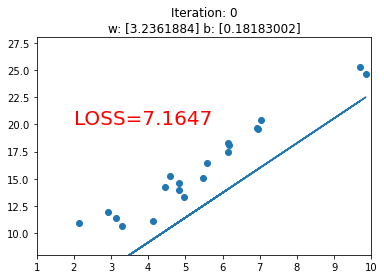

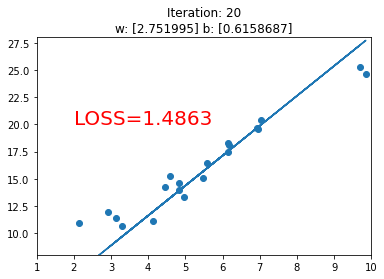

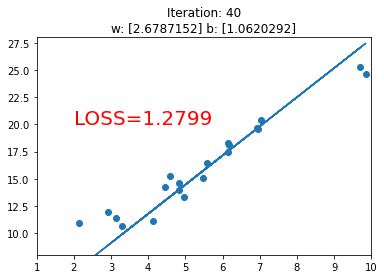

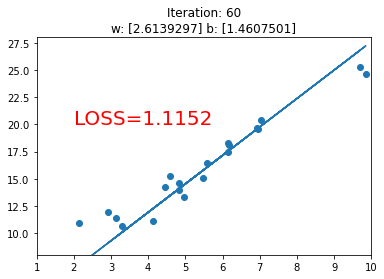

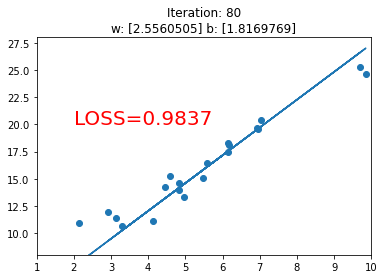

In [69]:
import torch
import matplotlib.pyplot as plt     # 用于绘图
torch.manual_seed(10)               # 设置随机数种子，种子被设定后，无论第几次运行程序，生成的随机数都是相同的

alpha = 0.05                        # 学习率

# 创建训练数据
x = torch.rand(20, 1) * 10          # x data (tensor), shape=(20, 1)
noise = torch.randn(20, 1)          # 生成噪声， torch.randn(size) 用于生成付出标准正态分布的数据
y = 2 * x + 5 + noise  # y data (tensor), shape=(20, 1)    y=2x+5+噪声

# 初始化值
w = torch.randn(1, requires_grad=True)  # 设置梯度求解为 true
b = torch.zeros(1, requires_grad=True)  # 设置梯度求解为 true

# 迭代训练
for iteration in range(1000):

    # 前向传播，计算预测值
    wx = torch.mul(w, x)
    y_pred = torch.add(wx, b)

    # 计算损失函数
    loss = (0.5 * (y - y_pred) ** 2).mean()

    # 反向传播
    loss.backward()

    # 更新参数
    w.data.sub_(other=w.grad, alpha=alpha)
    b.data.sub_(other=b.grad, alpha=alpha)

    # 每次更新参数之后，都要清零梯度

    w.grad.zero_()
    b.grad.zero_()

    # 绘图
    if iteration % 20 == 0:
        plt.scatter(x.data.numpy(), y.data.numpy())         # 绘制散点图
        plt.plot(x.data.numpy(), y_pred.data.numpy())       # 根据 x 和 y_pred 绘制直线
        plt.text(2, 20, 'LOSS=%.4f' % loss.data.numpy(), fontdict={'size' : 20, 'color' : 'red'})
                                                            # 图中标注
        plt.xlim(1, 10)                                     # 绘制 x 轴 min 和 max
        plt.ylim(8, 28)                                     # 绘制 y 轴 min 和 max
        plt.title('Iteration: {}\nw: {} b: {}'.format(iteration, w.data.numpy(), b.data.numpy()))
        plt.pause(0.5)

        # 如果 MSE 小于 1，则停止训练
        if loss.data.numpy() < 1:
            break;
